# Visualize the post processing data

In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set plot style parameters
plt.style.use('seaborn-v0_8')
%config InlineBackend.figure_format = 'retina'

## User Specific Parameters (CHANGE THESE)

In [4]:
data_path = "C:\\Users\\zacha\\Data\\AVI-DYS\\Results\\Post-Processing"

# Make sure this folders exists!
save_path = "C:\\Users\\zacha\\Data\\AVI-DYS\\Results\\Post-Processing\\Visualizations"

IDs = ['152']
pcutoff = 0.8 #FOR LABELS ONLY, change to same as post processing

In [5]:
# Create lists of landmark and segments names
left_x = ['LKNE_x', 'LANK_x', 'LD3M_x', 'LD1M_x', 'LHLX_x']
left_y = ['LKNE_y', 'LANK_y', 'LD3M_y', 'LD1M_y', 'LHLX_y']
left_mvmt_common = ['LKNE', 'LANK', 'LD3M', 'LD1M', 'LHLX']

right_x = ['RKNE_x', 'RANK_x', 'RD3M_x', 'RD1M_x','RHLX_x']
right_y = ['RKNE_y', 'RANK_y', 'RD3M_y', 'RD1M_y', 'RHLX_y']
right_mvmt_common = ['RKNE', 'RANK', 'RD3M', 'RD1M', 'RHLX']

left_length = ['LKNE_LANK_length',  'LANK_LD3M_length', 
                'LANK_LD1M_length', 'LD1M_LHLX_length']
left_orientation = ['LKNE_LANK_orientation', 'LANK_LD3M_orientation', 
                    'LANK_LD1M_orientation', 'LD1M_LHLX_orientation']
left_skltn_common = ['LKNE_LANK', 'LANK_LD3M', 'LANK_LD1M', 'LD1M_LHLX']

right_length = ['RKNE_RANK_length', 'RANK_RD3M_length',
                'RANK_RD1M_length', 'RD1M_RHLX_length']
right_orientation = ['RKNE_RANK_orientation', 'RANK_RD3M_orientation',
                        'RANK_RD1M_orientation', 'RD1M_RHLX_orientation']
right_skltn_common = ['RKNE_RANK', 'RANK_RD3M', 'RANK_RD1M', 'RD1M_RHLX']

In [6]:
def visualize_data(ID,stage,mvmt_left,mvmt_right,skltn_left,skltn_right):
    """Visualize the left and right movement and skeleton data

    Args:
        ID (str): participant ID
        stage (str): 0-Raw, 1-Imputed, 2-Scaled, 3-Normalized, or 4-Concatenated
        mvmt_left (DataFrame): Left Movement Data
        mvmt_right (_type_): Right Movement Data
        skltn_left (_type_): Left Skeleton Data
        skltn_right (_type_): Right Skeleton Data
    """
    # Left Movement Data Visualization
    fig,axs = plt.subplots(nrows=5,ncols=2,sharex=True,figsize=(11,7),layout='constrained')
    itr = 0
    for x in left_x:
        axs[itr, 0].plot(mvmt_left[x])
        axs[itr, 0].set_ylabel(left_mvmt_common[itr])
        itr += 1
    axs[0, 0].set_title('X Coordinates',loc='left',style='italic',fontsize='small')
    
    itr = 0
    for y in left_y:
        axs[itr,1].plot(mvmt_left[y])
        axs[itr,1].set_ylabel('')
        itr +=1
    axs[0, 1].set_title('Y Coordinates',loc='left',style='italic',fontsize='small')    
    
    fig.supxlabel('Video Frame [25 fps]', fontsize='large',fontweight='bold')
    fig.supylabel('Body Parts', fontsize='large',fontweight='bold')
    title = f'Left Movement Data: {stage} | Participant {i}, p-cutoff = {pcutoff}'
    fig.suptitle(title, fontsize='large',fontweight='bold')

    svg_path = os.path.join(save_path,f'{i}-{stage}-mvmt-left.svg')
    png_path = os.path.join(save_path,f'{i}-{stage}-mvmt-left.png')
    plt.savefig(svg_path, bbox_inches='tight')
    plt.savefig(png_path, dpi=400, bbox_inches='tight')




    # Right movement data visualization
    fig,axs = plt.subplots(nrows=5,ncols=2,sharex=True,figsize=(11,7),layout='constrained')
    itr = 0
    for x in right_x:
        axs[itr, 0].plot(mvmt_right[x])
        axs[itr, 0].set_ylabel(right_mvmt_common[itr])
        itr += 1
    axs[0, 0].set_title('X Coordinates',loc='left',style='italic',fontsize='small')
    
    itr = 0
    for y in right_y:
        axs[itr,1].plot(mvmt_right[y])
        axs[itr,1].set_ylabel('')
        itr +=1
    axs[0, 1].set_title('Y Coordinates',loc='left',style='italic',fontsize='small')    
    
    fig.supxlabel('Video Frame [25 fps]', fontsize='large',fontweight='bold')
    fig.supylabel('Body Parts', fontsize='large',fontweight='bold')
    title = f'Right Movement Data: {stage} | Participant {i}, p-cutoff = {pcutoff}'
    fig.suptitle(title, fontsize='large',fontweight='bold')

    svg_path = os.path.join(save_path,f'{i}-{stage}-mvmt-right.svg')
    png_path = os.path.join(save_path,f'{i}-{stage}-mvmt-right.png')
    plt.savefig(svg_path, bbox_inches='tight')
    plt.savefig(png_path, dpi=400, bbox_inches='tight')




    # Left Skeleton Data Visualization
    fig,axs = plt.subplots(nrows=4,ncols=2,sharex=True,figsize=(11,7),layout='constrained')
    itr = 0
    for x in left_length:
        axs[itr, 0].plot(skltn_left[x])
        axs[itr, 0].set_ylabel(left_skltn_common[itr])
        itr += 1
    axs[0, 0].set_title('Segment Length',loc='left',style='italic',fontsize='small')
    
    itr = 0
    for y in left_orientation:
        axs[itr,1].plot(skltn_left[y])
        axs[itr,1].set_ylabel('')
        itr +=1
    axs[0, 1].set_title('Segment Orientation',loc='left',style='italic',fontsize='small')    
    
    fig.supxlabel('Video Frame [25 fps]', fontsize='large',fontweight='bold')
    fig.supylabel('Segments', fontsize='large',fontweight='bold')
    title = f'Left Skeleton Data: {stage} | Participant {i}, p-cutoff = {pcutoff}'
    fig.suptitle(title, fontsize='large',fontweight='bold')

    svg_path = os.path.join(save_path,f'{i}-{stage}-skltn-left.svg')
    png_path = os.path.join(save_path,f'{i}-{stage}-skltn-left.png')
    plt.savefig(svg_path, bbox_inches='tight')
    plt.savefig(png_path, dpi=400, bbox_inches='tight')




    # Right Skeleton Data Visualization
    fig,axs = plt.subplots(nrows=4,ncols=2,sharex=True,figsize=(11,7),layout='constrained')
    itr = 0
    for x in right_length:
        axs[itr, 0].plot(skltn_right[x])
        axs[itr, 0].set_ylabel(right_skltn_common[itr])
        itr += 1
    axs[0, 0].set_title('Segment Length',loc='left',style='italic',fontsize='small')
    
    itr = 0
    for y in right_orientation:
        axs[itr,1].plot(skltn_right[y])
        axs[itr,1].set_ylabel('')
        itr +=1
    axs[0, 1].set_title('Segment Orientation',loc='left',style='italic',fontsize='small')    
    
    fig.supxlabel('Video Frame [25 fps]', fontsize='large',fontweight='bold')
    fig.supylabel('Segments', fontsize='large',fontweight='bold')
    title = f'Right Skeleton Data: {stage} | Participant {i}, p-cutoff = {pcutoff}'
    fig.suptitle(title, fontsize='large',fontweight='bold')

    svg_path = os.path.join(save_path,f'{i}-{stage}-skltn-right.svg')
    png_path = os.path.join(save_path,f'{i}-{stage}-skltn-right.png')
    plt.savefig(svg_path, bbox_inches='tight')
    plt.savefig(png_path, dpi=400, bbox_inches='tight')

## Visualize the raw data

In [ ]:
stage = '0-Raw'

for i in IDs:
    mvmt_left = pd.read_csv(os.path.join(data_path,f'{stage}',f'{i}-mvmt-left.csv'))
    mvmt_right = pd.read_csv(os.path.join(data_path,f'{stage}',f'{i}-mvmt-right.csv'))
    skltn_left = pd.read_csv(os.path.join(data_path,f'{stage}',f'{i}-skltn-left.csv'))
    skltn_right = pd.read_csv(os.path.join(data_path,f'{stage}',f'{i}-skltn-right.csv'))

    visualize_data(i,stage,mvmt_left,mvmt_right,skltn_left,skltn_right)

## Visualize the imputed data

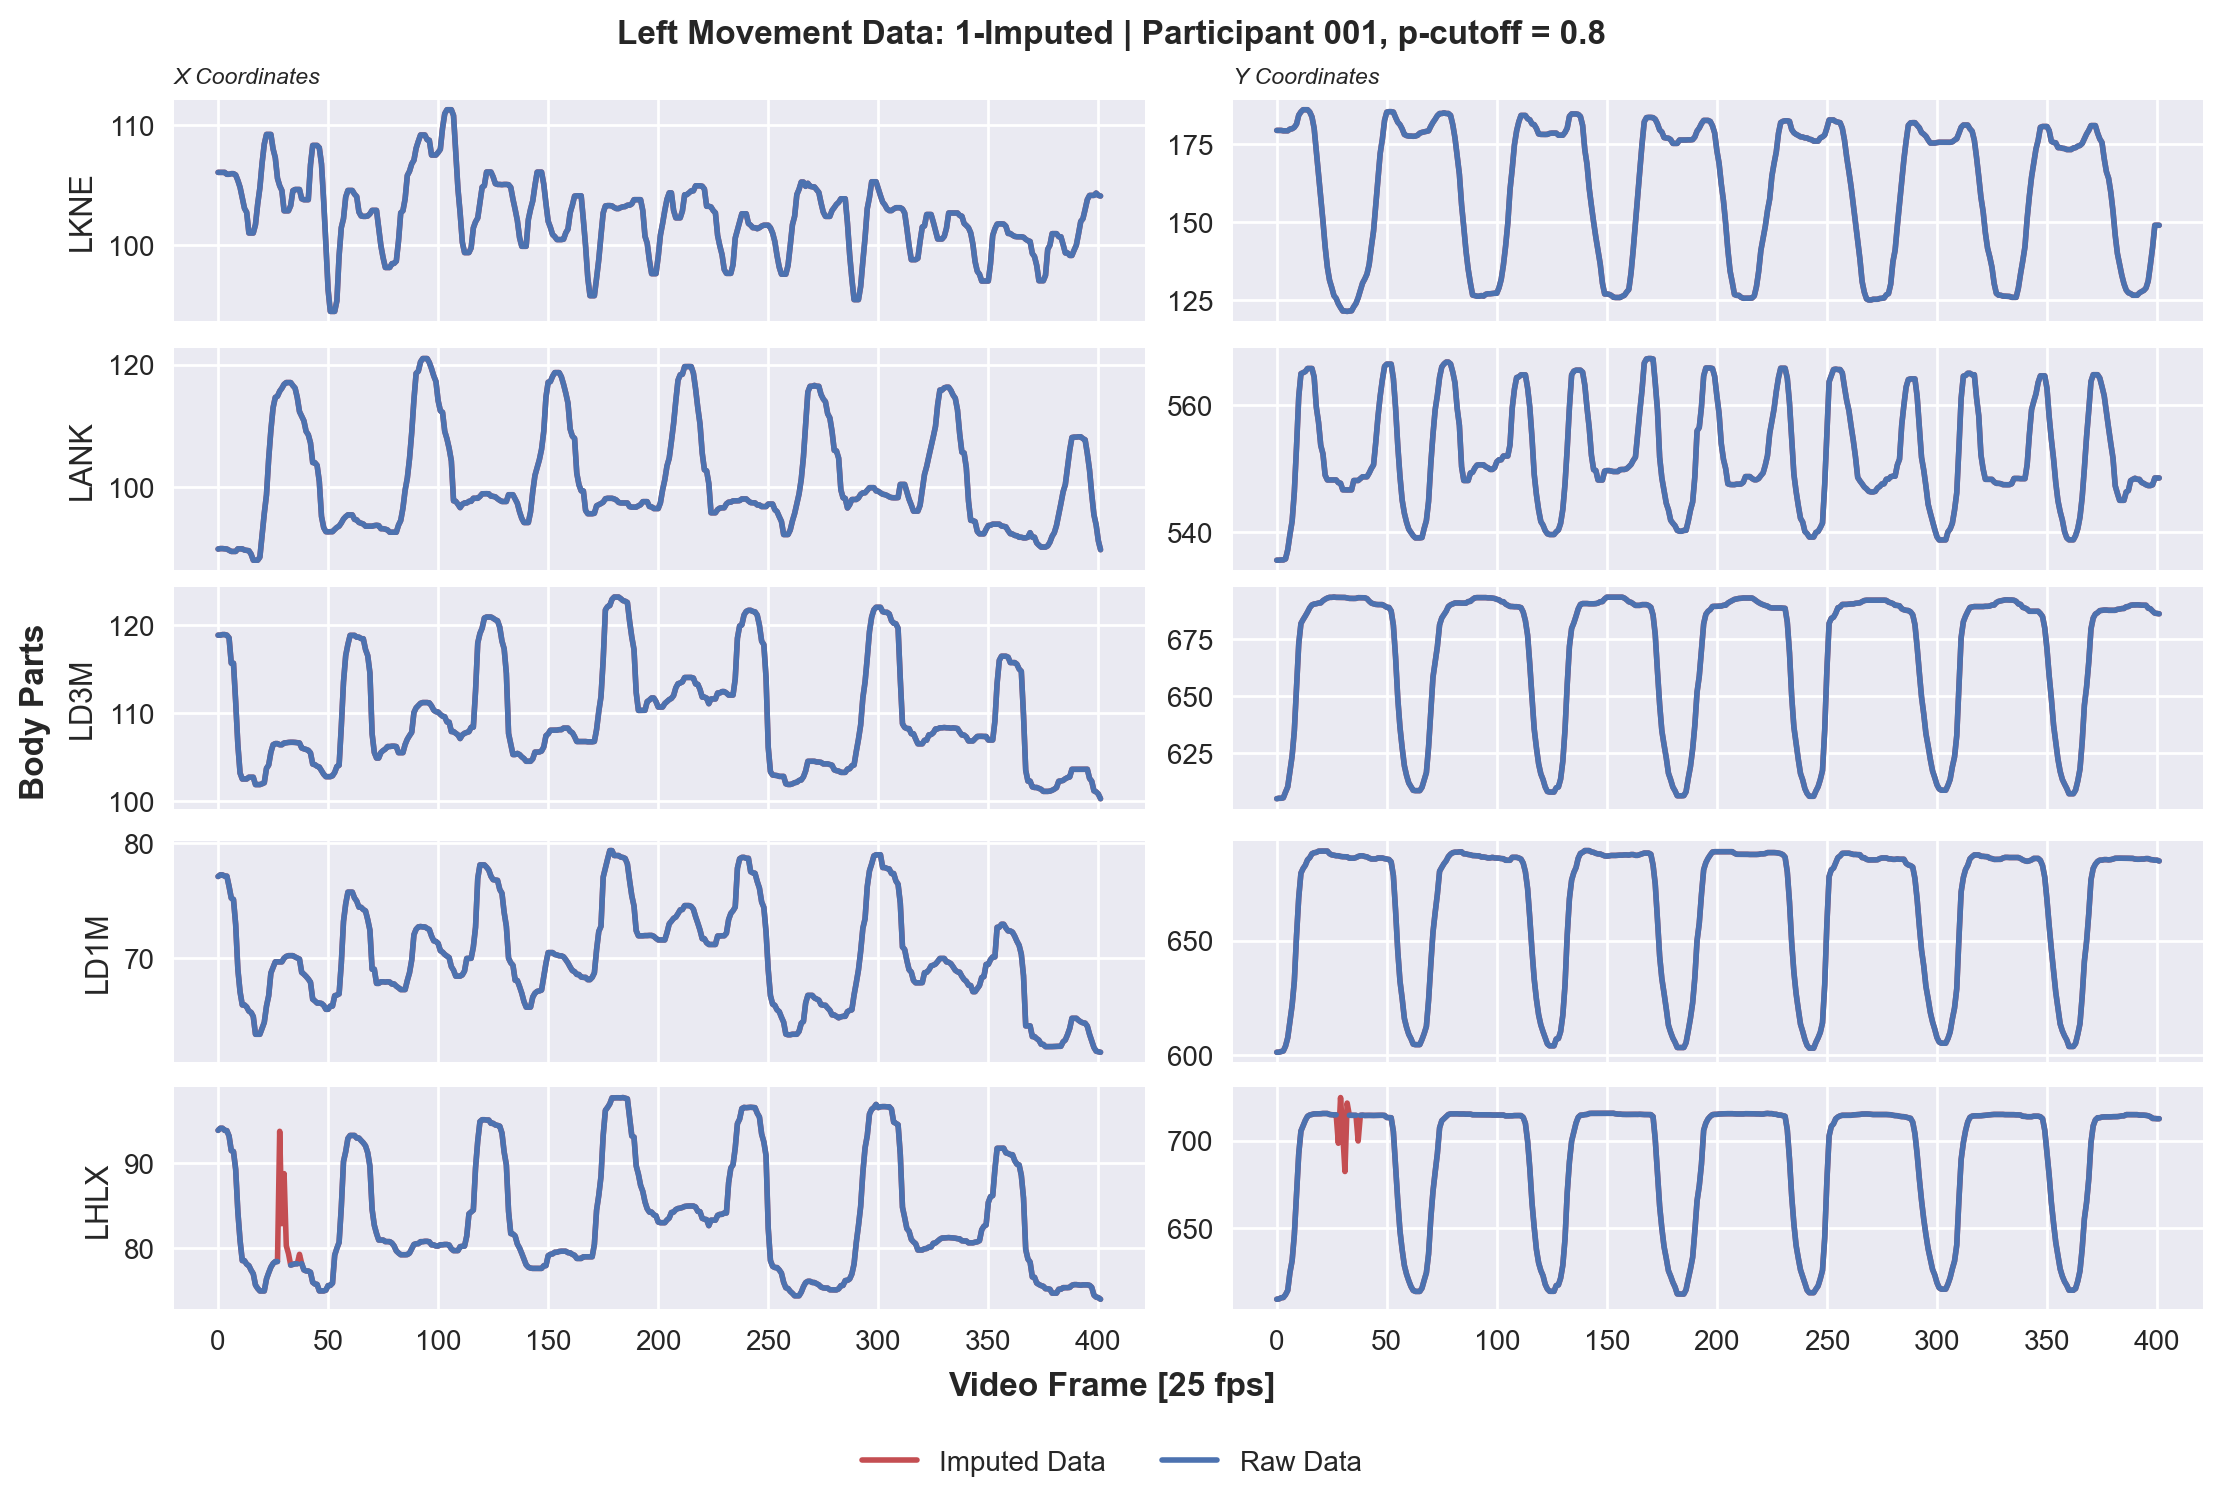

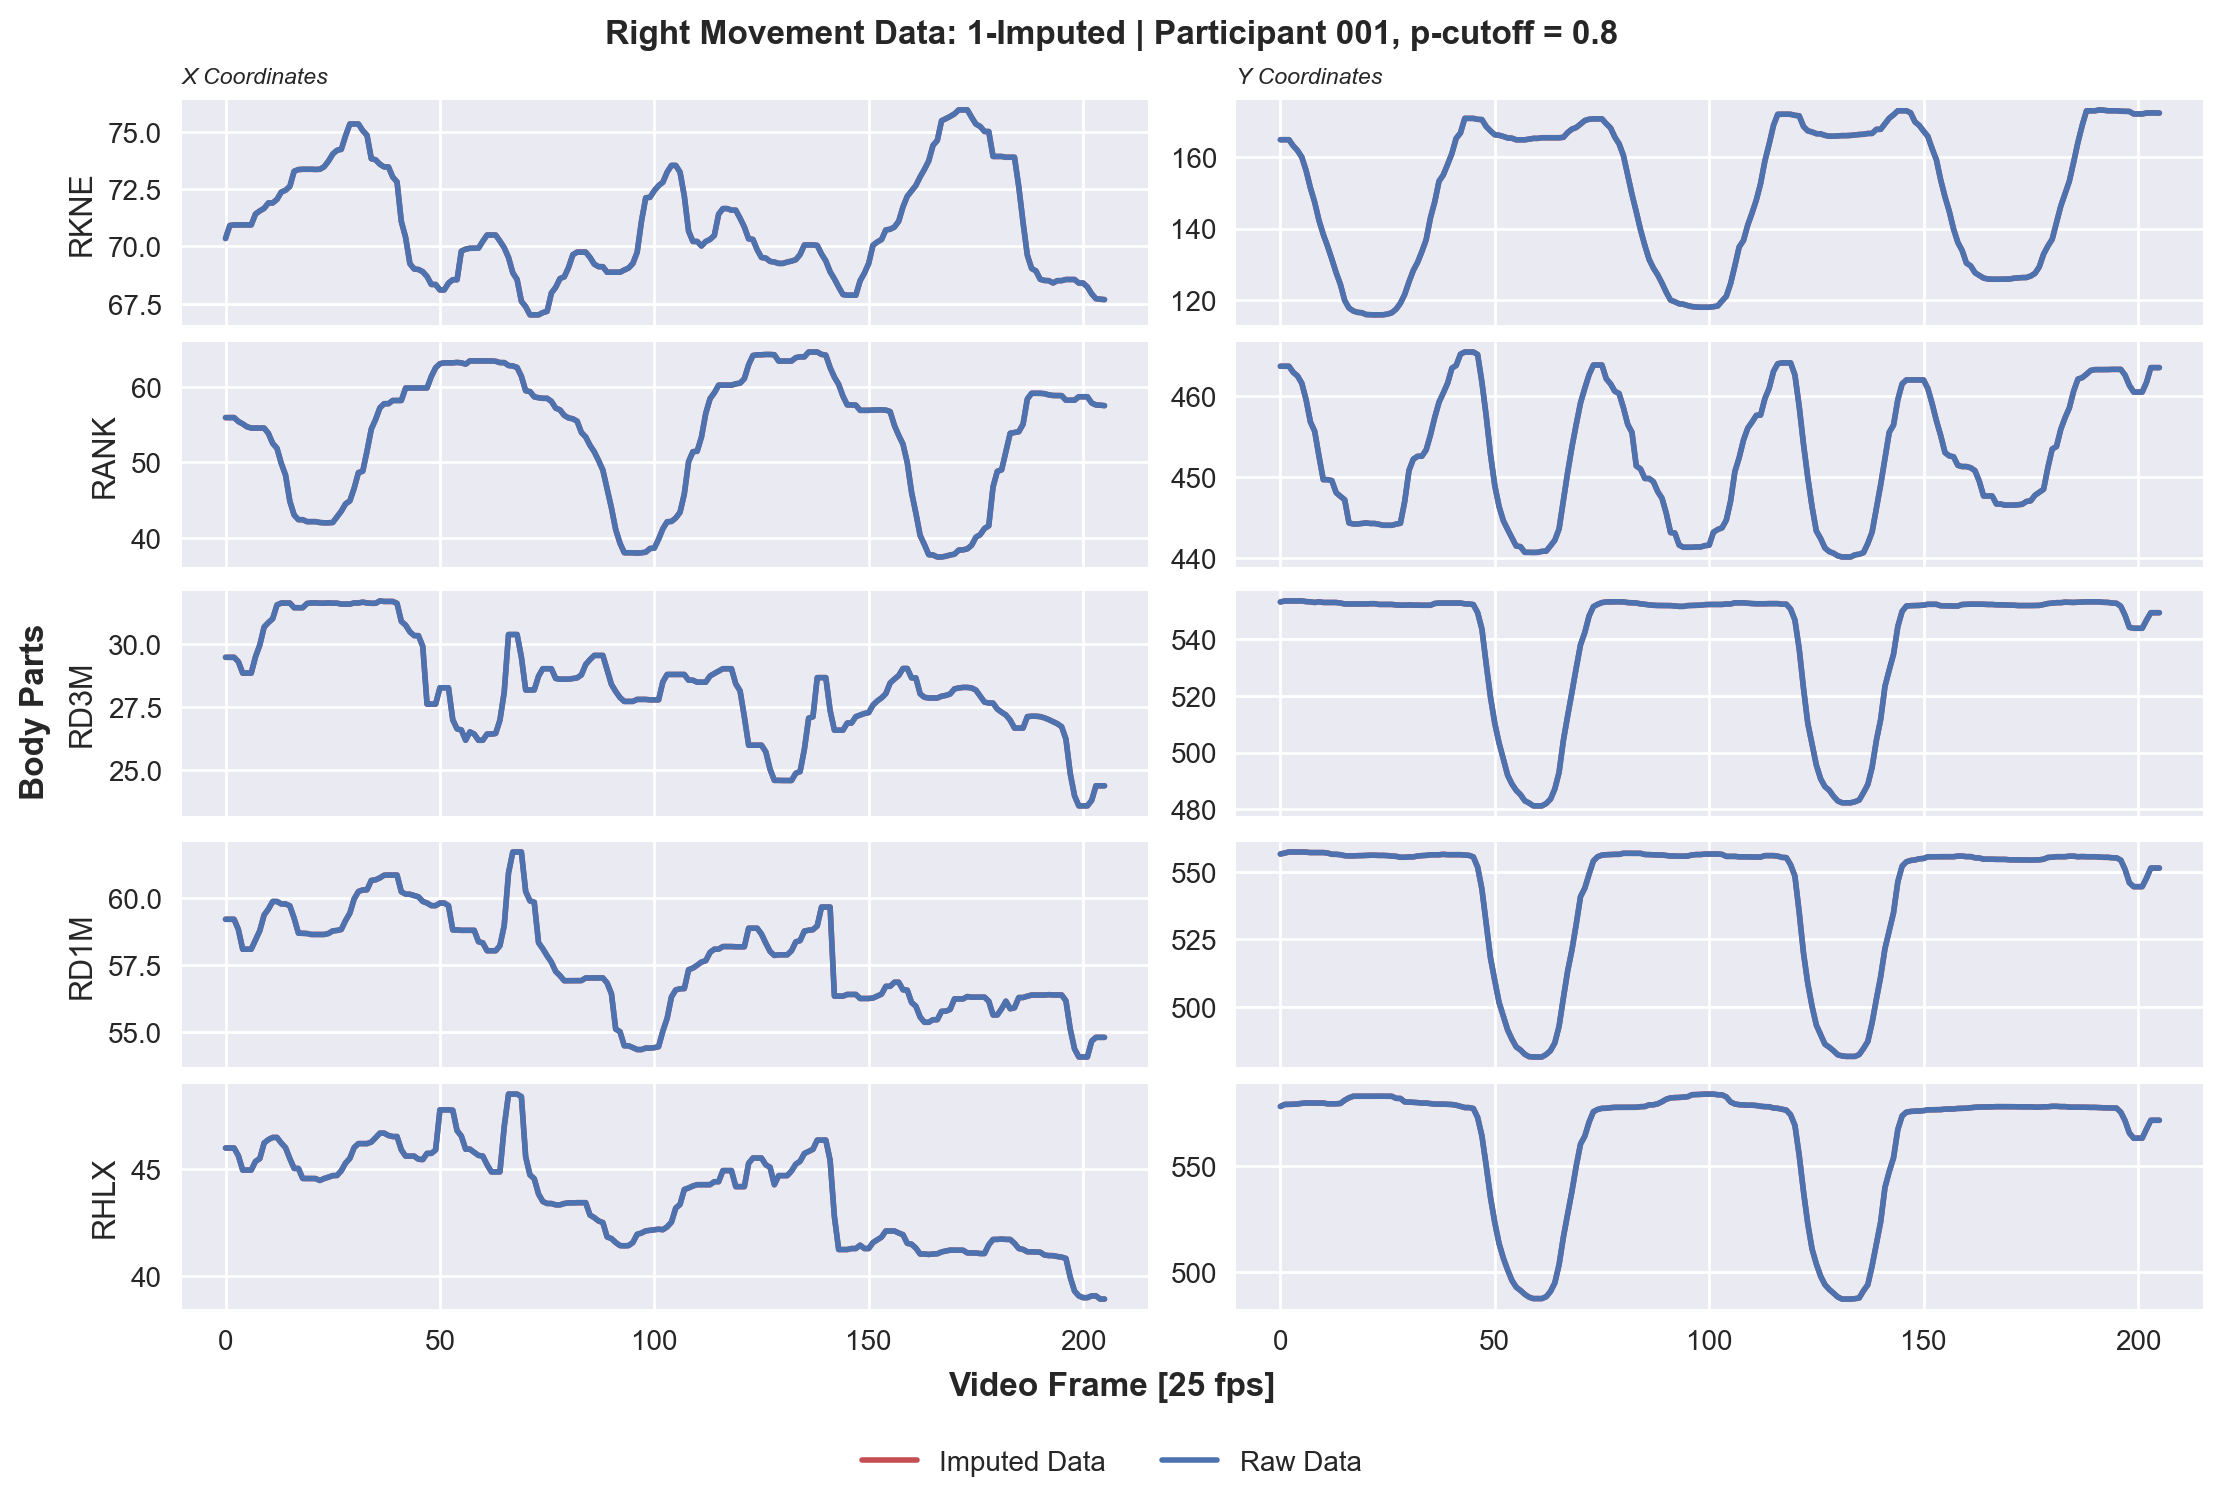

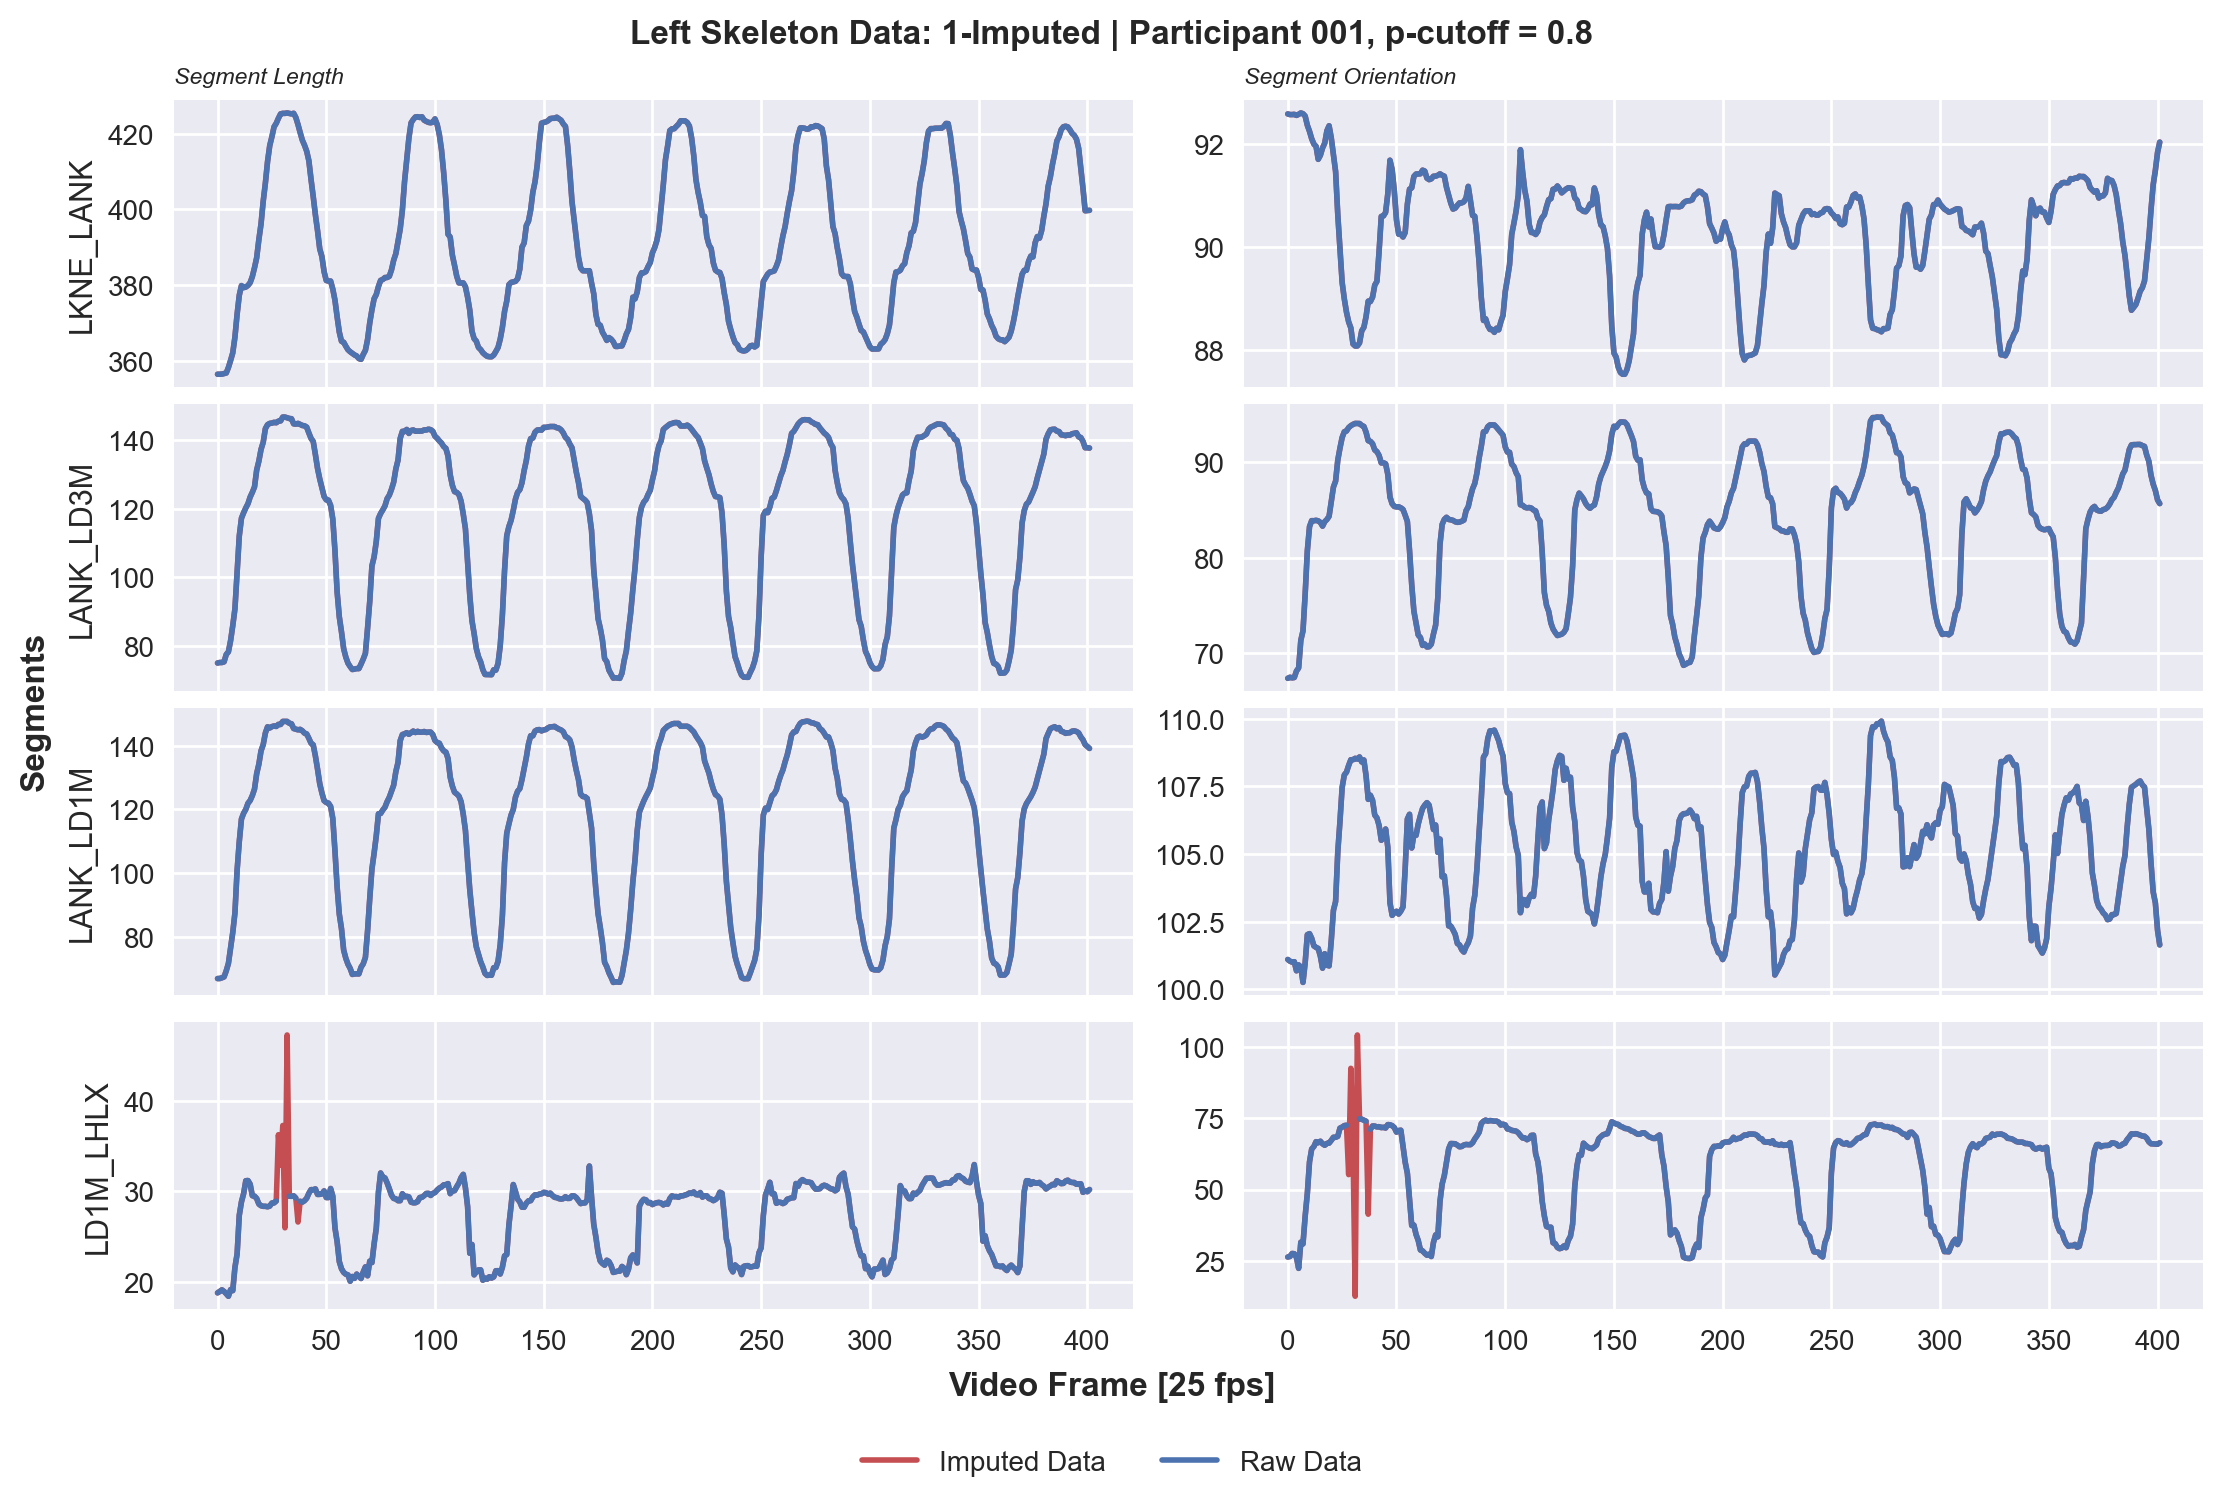

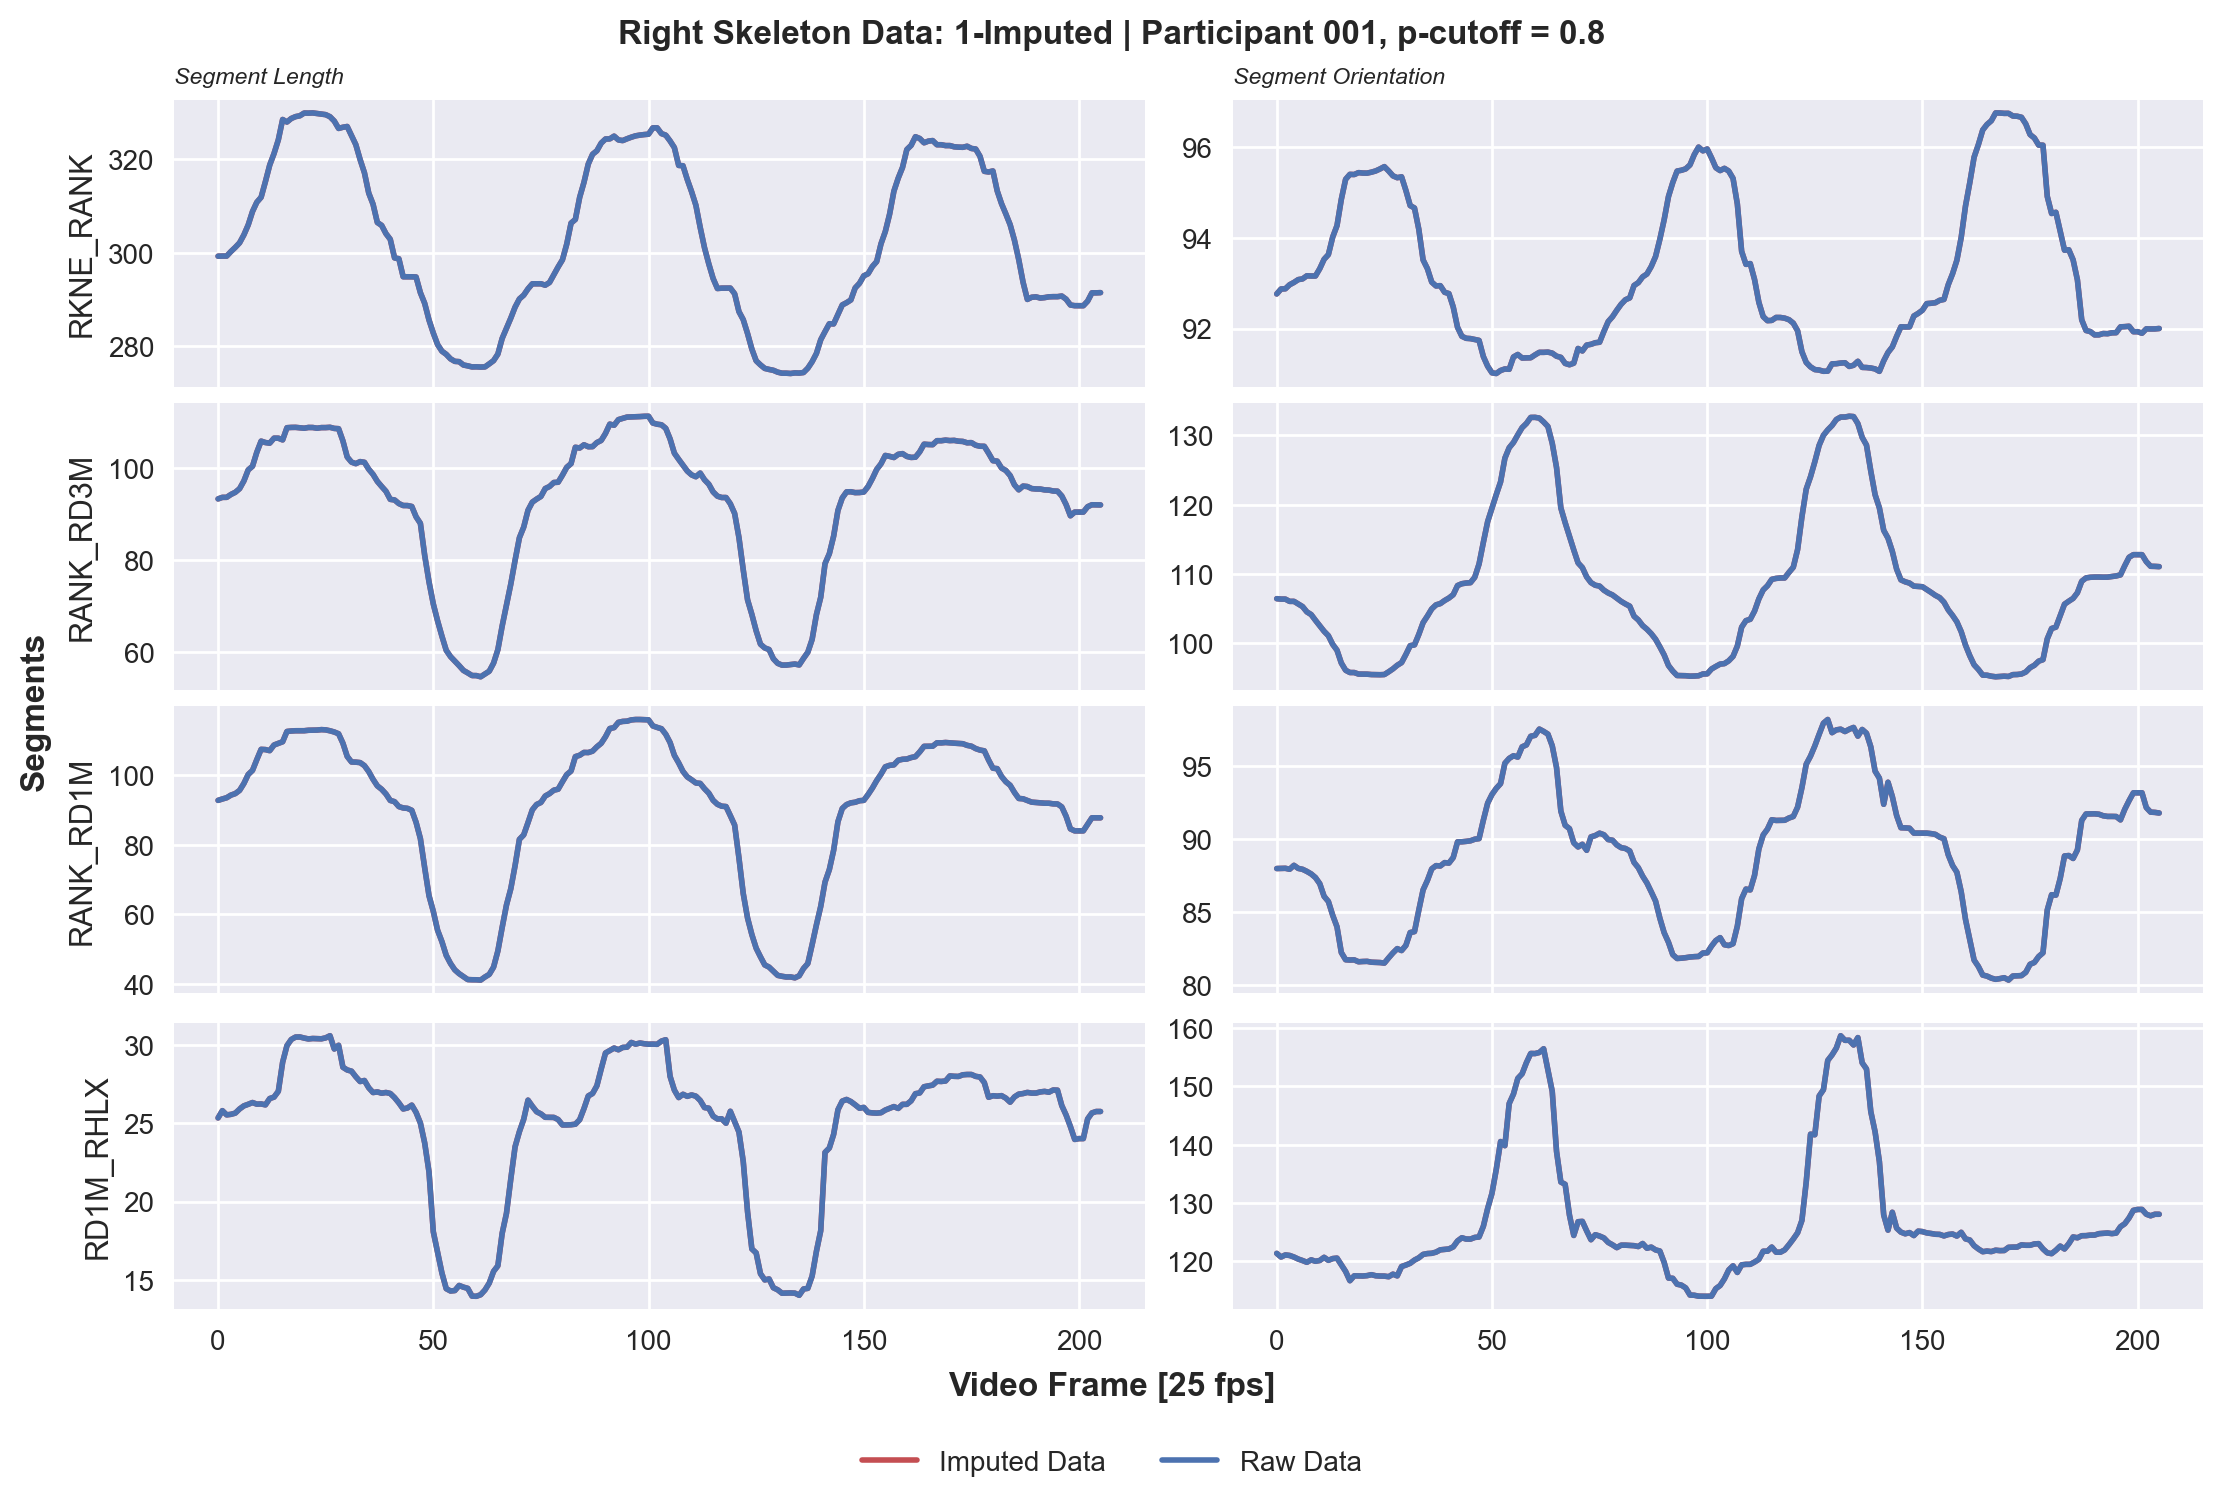

In [13]:
stage = '1-Imputed'

for i in IDs:
    mvmt_data_left = pd.read_csv(os.path.join(data_path,'0-Raw',f'{i}-mvmt-left.csv'))
    mvmt_data_right = pd.read_csv(os.path.join(data_path,'0-Raw',f'{i}-mvmt-right.csv'))
    skltn_data_left = pd.read_csv(os.path.join(data_path,'0-Raw',f'{i}-skltn-left.csv'))
    skltn_data_right = pd.read_csv(os.path.join(data_path,'0-Raw',f'{i}-skltn-right.csv'))

    mvmt_imp_left = pd.read_csv(os.path.join(data_path,f'{stage}',f'{i}-mvmt-left.csv'))
    mvmt_imp_right = pd.read_csv(os.path.join(data_path,f'{stage}',f'{i}-mvmt-right.csv'))
    skltn_imp_left = pd.read_csv(os.path.join(data_path,f'{stage}',f'{i}-skltn-left.csv'))
    skltn_imp_right = pd.read_csv(os.path.join(data_path,f'{stage}',f'{i}-skltn-right.csv'))




    # Left Movement Data Visualization
    fig,axs = plt.subplots(nrows=5,ncols=2,sharex=True,figsize=(11,7),layout='constrained')
    itr = 0
    for x in left_x:
        axs[itr, 0].plot(mvmt_imp_left[x], linewidth=2, color='C2', label='Imputed')
        axs[itr, 0].plot(mvmt_data_left[x], linewidth=2, color='C0', label='raw')
        axs[itr, 0].set_ylabel(left_mvmt_common[itr])
        itr += 1
    axs[0, 0].set_title('X Coordinates',loc='left',style='italic',fontsize='small')
    
    itr = 0
    for y in left_y:
        axs[itr,1].plot(mvmt_imp_left[y], linewidth=2, color='C2')
        axs[itr,1].plot(mvmt_data_left[y], linewidth=2, color='C0')
        axs[itr,1].set_ylabel('')
        itr +=1
    axs[0, 1].set_title('Y Coordinates',loc='left',style='italic',fontsize='small')    
    
    fig.supxlabel('Video Frame [25 fps]', fontsize='large',fontweight='bold')
    fig.supylabel('Body Parts', fontsize='large',fontweight='bold')
    title = f'Left Movement Data: {stage} | Participant {i}, p-cutoff = {pcutoff}'
    fig.suptitle(title, fontsize='large',fontweight='bold')
    
    fig.legend(bbox_to_anchor=(0.5, -0.01), loc='upper center',ncol=2,labels=['Imputed Data','Raw Data'])
    
    svg_path = os.path.join(save_path,f'{i}-{stage}-mvmt-left.svg')
    png_path = os.path.join(save_path,f'{i}-{stage}-mvmt-left.png')
    plt.savefig(svg_path, bbox_inches='tight')
    plt.savefig(png_path, dpi=400, bbox_inches='tight')




    # Right Movement Data Visualization
    fig,axs = plt.subplots(nrows=5,ncols=2,sharex=True,figsize=(11,7),layout='constrained')
    itr = 0
    for x in right_x:
        axs[itr, 0].plot(mvmt_imp_right[x], linewidth=2, color='C2')
        axs[itr, 0].plot(mvmt_data_right[x], linewidth=2, color='C0')
        axs[itr, 0].set_ylabel(right_mvmt_common[itr])
        itr += 1
    axs[0, 0].set_title('X Coordinates',loc='left',style='italic',fontsize='small')
    
    itr = 0
    for y in right_y:
        axs[itr,1].plot(mvmt_imp_right[y], linewidth=2, color='C2')
        axs[itr,1].plot(mvmt_data_right[y], linewidth=2, color='C0')
        axs[itr,1].set_ylabel('')
        itr +=1
    axs[0, 1].set_title('Y Coordinates',loc='left',style='italic',fontsize='small')    
    
    fig.supxlabel('Video Frame [25 fps]', fontsize='large',fontweight='bold')
    fig.supylabel('Body Parts', fontsize='large',fontweight='bold')
    title = f'Right Movement Data: {stage} | Participant {i}, p-cutoff = {pcutoff}'
    fig.suptitle(title, fontsize='large',fontweight='bold')
    
    fig.legend(bbox_to_anchor=(0.5, -0.01), loc='upper center',ncol=2,labels=['Imputed Data','Raw Data'])
    
    svg_path = os.path.join(save_path,f'{i}-{stage}-mvmt-right.svg')
    png_path = os.path.join(save_path,f'{i}-{stage}-mvmt-right.png')
    plt.savefig(svg_path, bbox_inches='tight')
    plt.savefig(png_path, dpi=400, bbox_inches='tight')




    # Left Skeleton Data Visualization
    fig,axs = plt.subplots(nrows=4,ncols=2,sharex=True,figsize=(11,7),layout='constrained')
    itr = 0
    for x in left_length:
        axs[itr, 0].plot(skltn_imp_left[x], linewidth=2, color='C2')
        axs[itr, 0].plot(skltn_data_left[x], linewidth=2, color='C0')
        axs[itr, 0].set_ylabel(left_skltn_common[itr])
        itr += 1
    axs[0, 0].set_title('Segment Length',loc='left',style='italic',fontsize='small')
    
    itr = 0
    for y in left_orientation:
        axs[itr,1].plot(skltn_imp_left[y], linewidth=2, color='C2')
        axs[itr,1].plot(skltn_data_left[y], linewidth=2, color='C0')
        axs[itr,1].set_ylabel('')
        itr +=1
    axs[0, 1].set_title('Segment Orientation',loc='left',style='italic',fontsize='small')    
    
    fig.supxlabel('Video Frame [25 fps]', fontsize='large',fontweight='bold')
    fig.supylabel('Segments', fontsize='large',fontweight='bold')
    title = f'Left Skeleton Data: {stage} | Participant {i}, p-cutoff = {pcutoff}'
    fig.suptitle(title, fontsize='large',fontweight='bold')
    
    fig.legend(bbox_to_anchor=(0.5, -0.01), loc='upper center',ncol=2,labels=['Imputed Data','Raw Data'])

    svg_path = os.path.join(save_path,f'{i}-{stage}-skltn-left.svg')
    png_path = os.path.join(save_path,f'{i}-{stage}-skltn-left.png')
    plt.savefig(svg_path, bbox_inches='tight')
    plt.savefig(png_path, dpi=400, bbox_inches='tight')




    # Right Skeleton Data Visualization
    fig,axs = plt.subplots(nrows=4,ncols=2,sharex=True,figsize=(11,7),layout='constrained')
    itr = 0
    for x in right_length:
        axs[itr, 0].plot(skltn_imp_right[x],linewidth=2, color='C2')
        axs[itr, 0].plot(skltn_data_right[x], linewidth=2, color='C0')
        axs[itr, 0].set_ylabel(right_skltn_common[itr])
        itr += 1
    axs[0, 0].set_title('Segment Length',loc='left',style='italic',fontsize='small')
    
    itr = 0
    for y in right_orientation:
        axs[itr,1].plot(skltn_imp_right[y], linewidth=2, color='C2')
        axs[itr,1].plot(skltn_data_right[y], linewidth=2, color='C0')
        axs[itr,1].set_ylabel('')
        itr +=1
    axs[0, 1].set_title('Segment Orientation',loc='left',style='italic',fontsize='small')    
    
    fig.supxlabel('Video Frame [25 fps]', fontsize='large',fontweight='bold')
    fig.supylabel('Segments', fontsize='large',fontweight='bold')
    title = f'Right Skeleton Data: {stage} | Participant {i}, p-cutoff = {pcutoff}'
    fig.suptitle(title, fontsize='large',fontweight='bold')
    
    fig.legend(bbox_to_anchor=(0.5, -0.01), loc='upper center',ncol=2,labels=['Imputed Data','Raw Data'])    

    svg_path = os.path.join(save_path,f'{i}-{stage}-skltn-right.svg')
    png_path = os.path.join(save_path,f'{i}-{stage}-skltn-right.png')
    plt.savefig(svg_path, bbox_inches='tight')
    plt.savefig(png_path, dpi=400, bbox_inches='tight')

## Visualize the filtered data

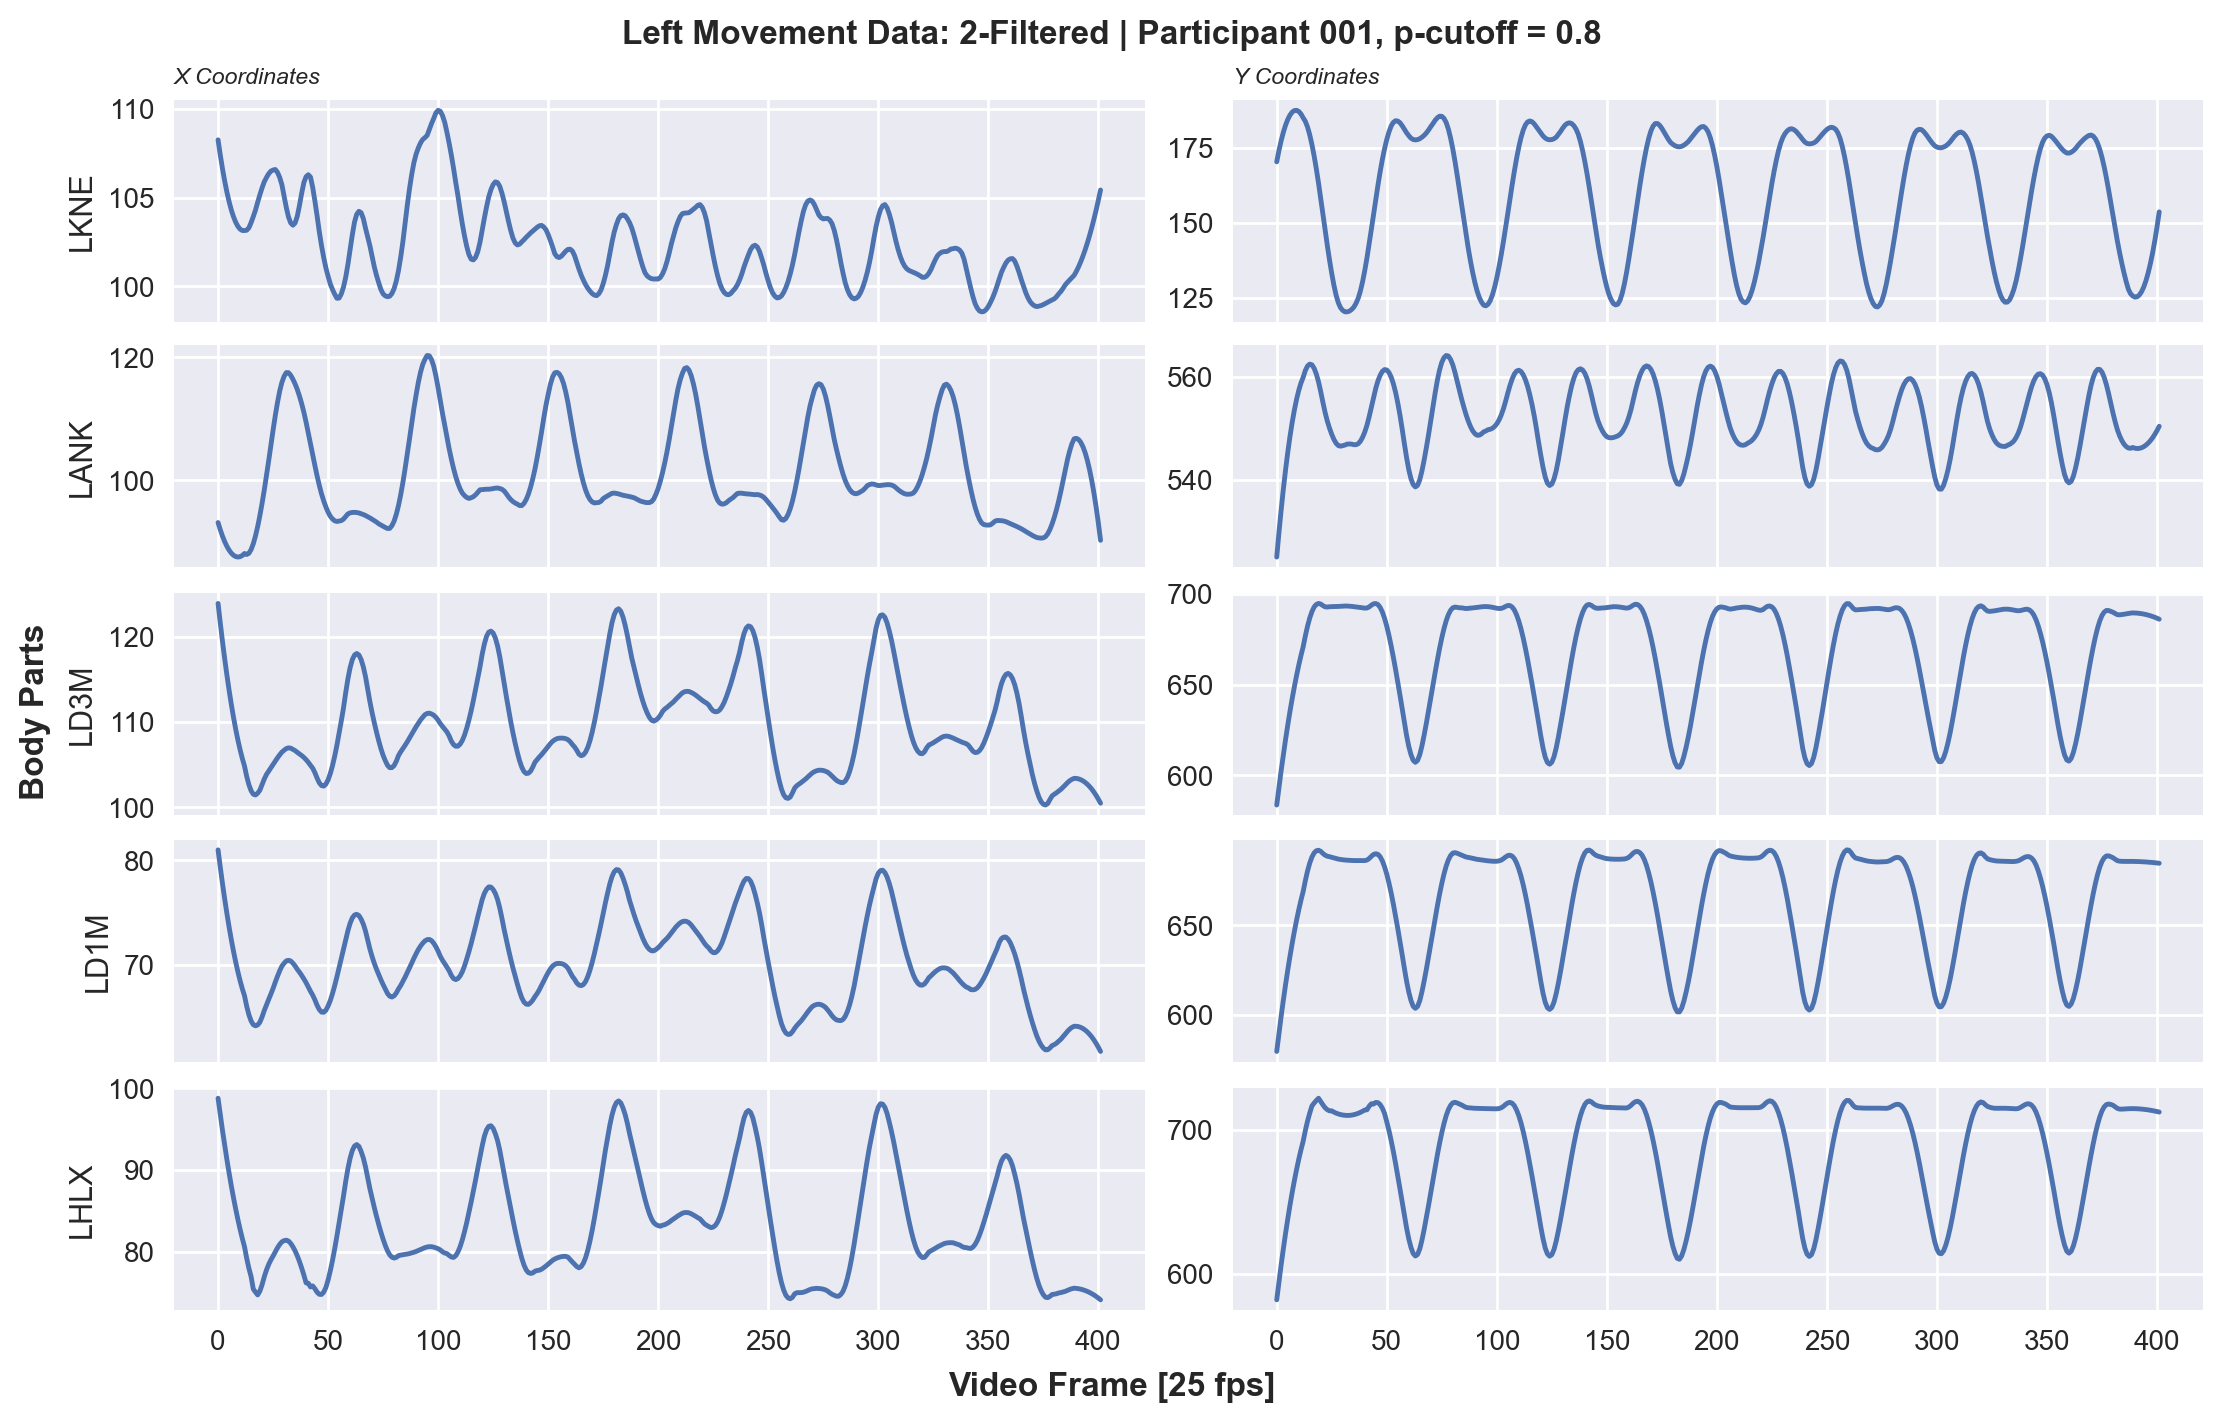

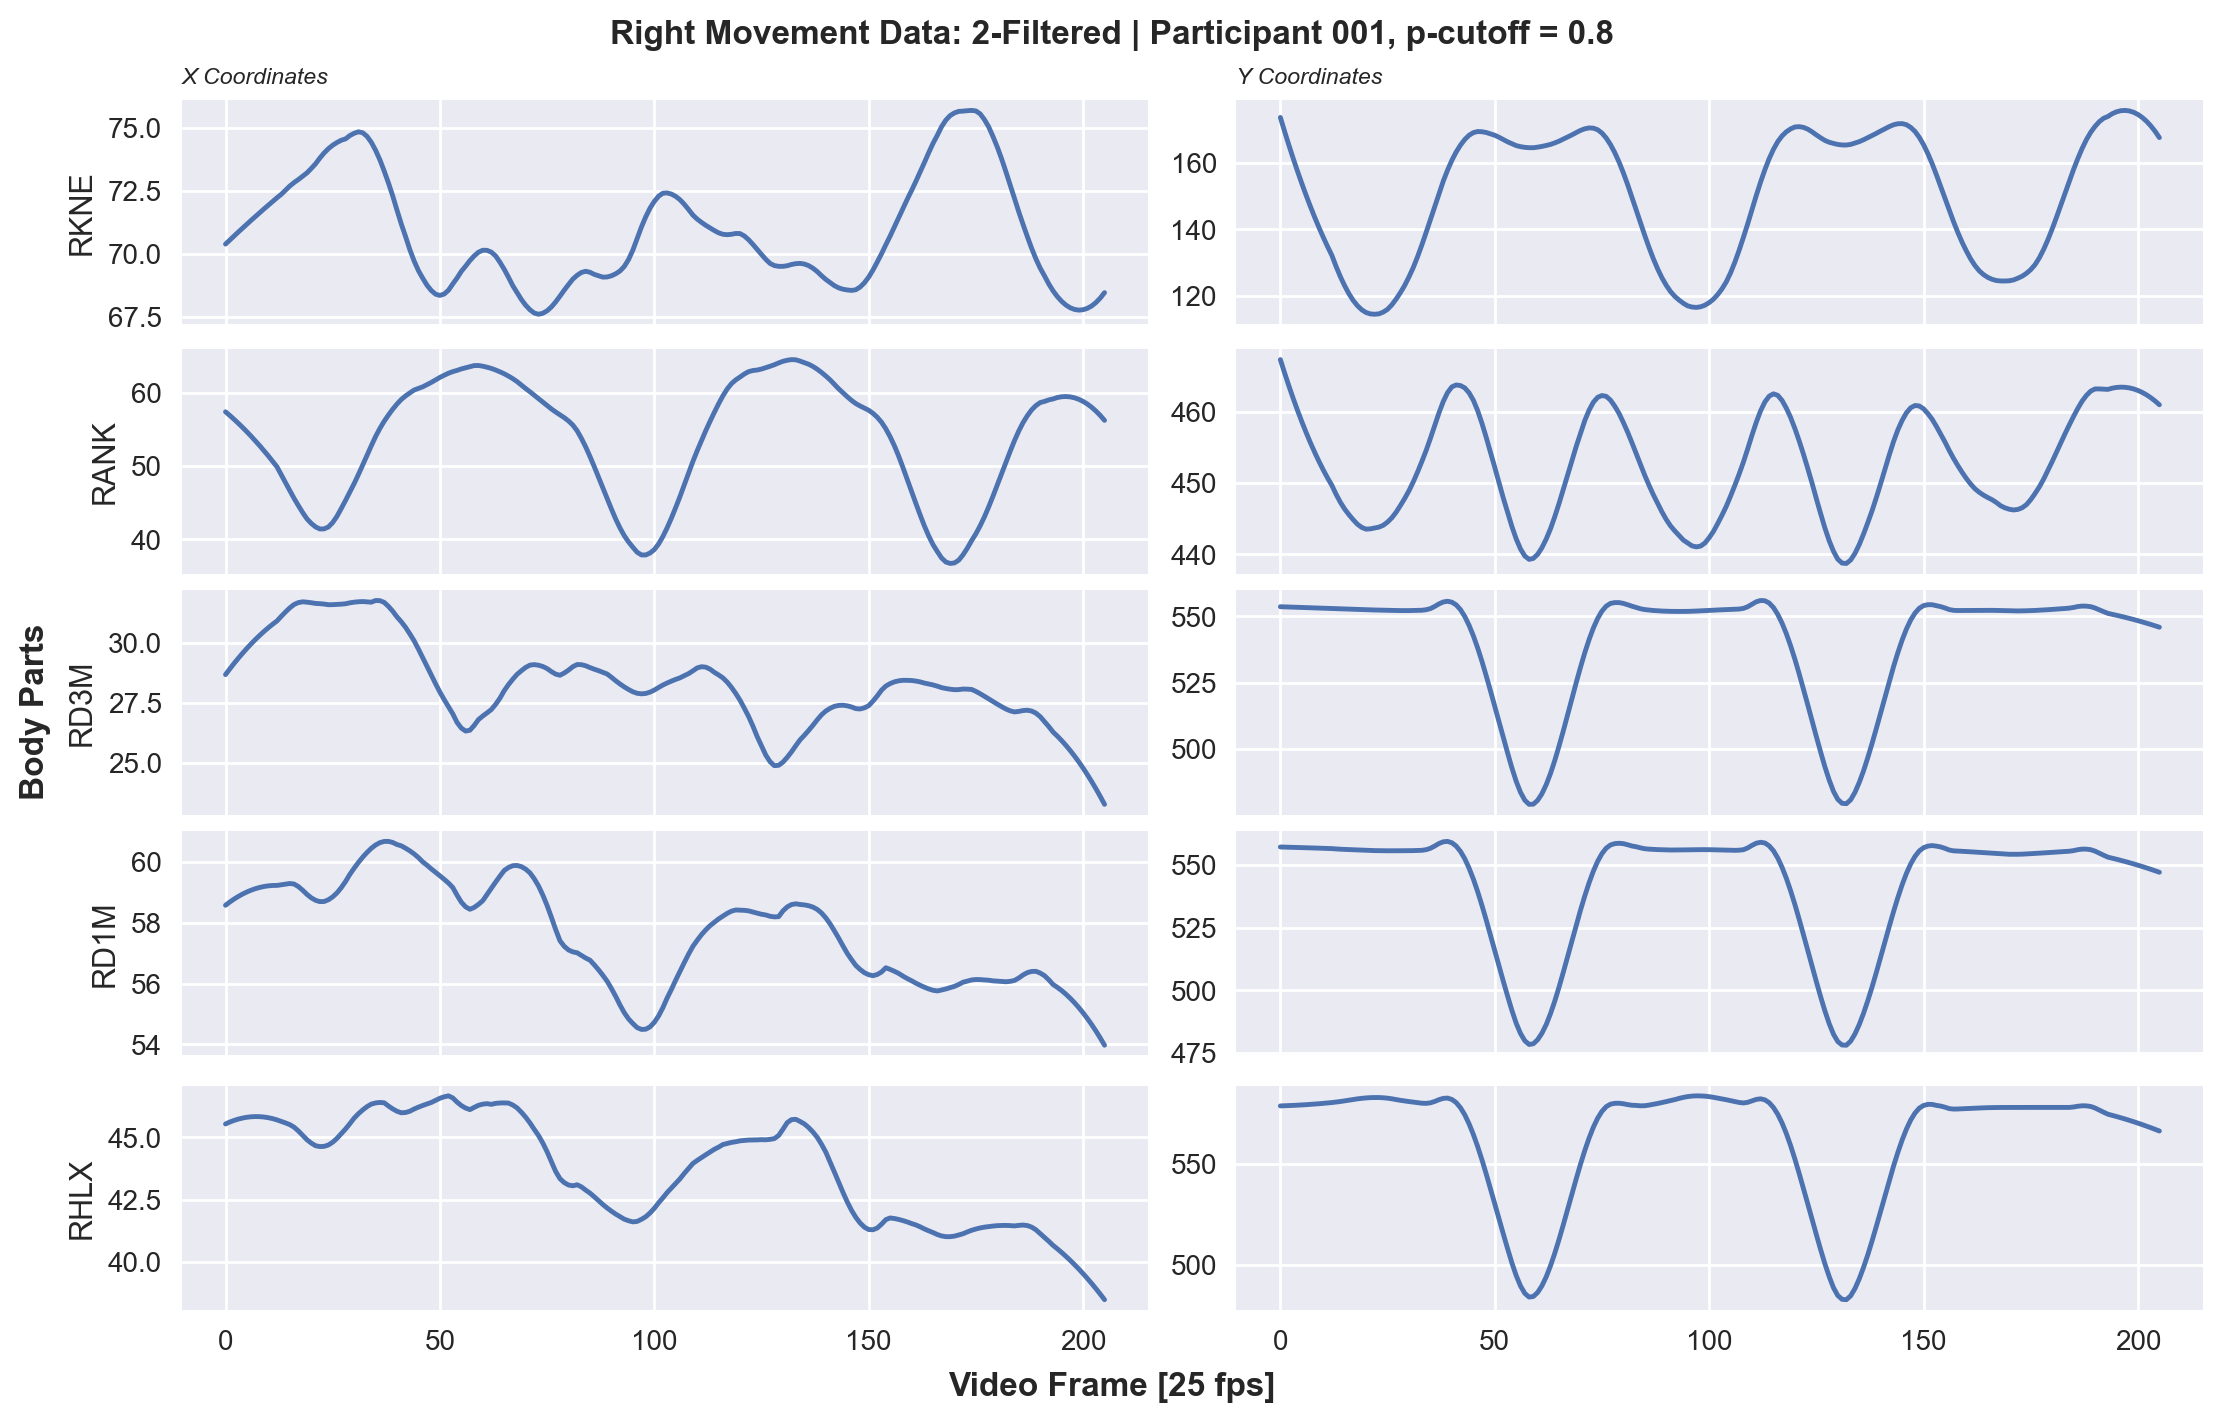

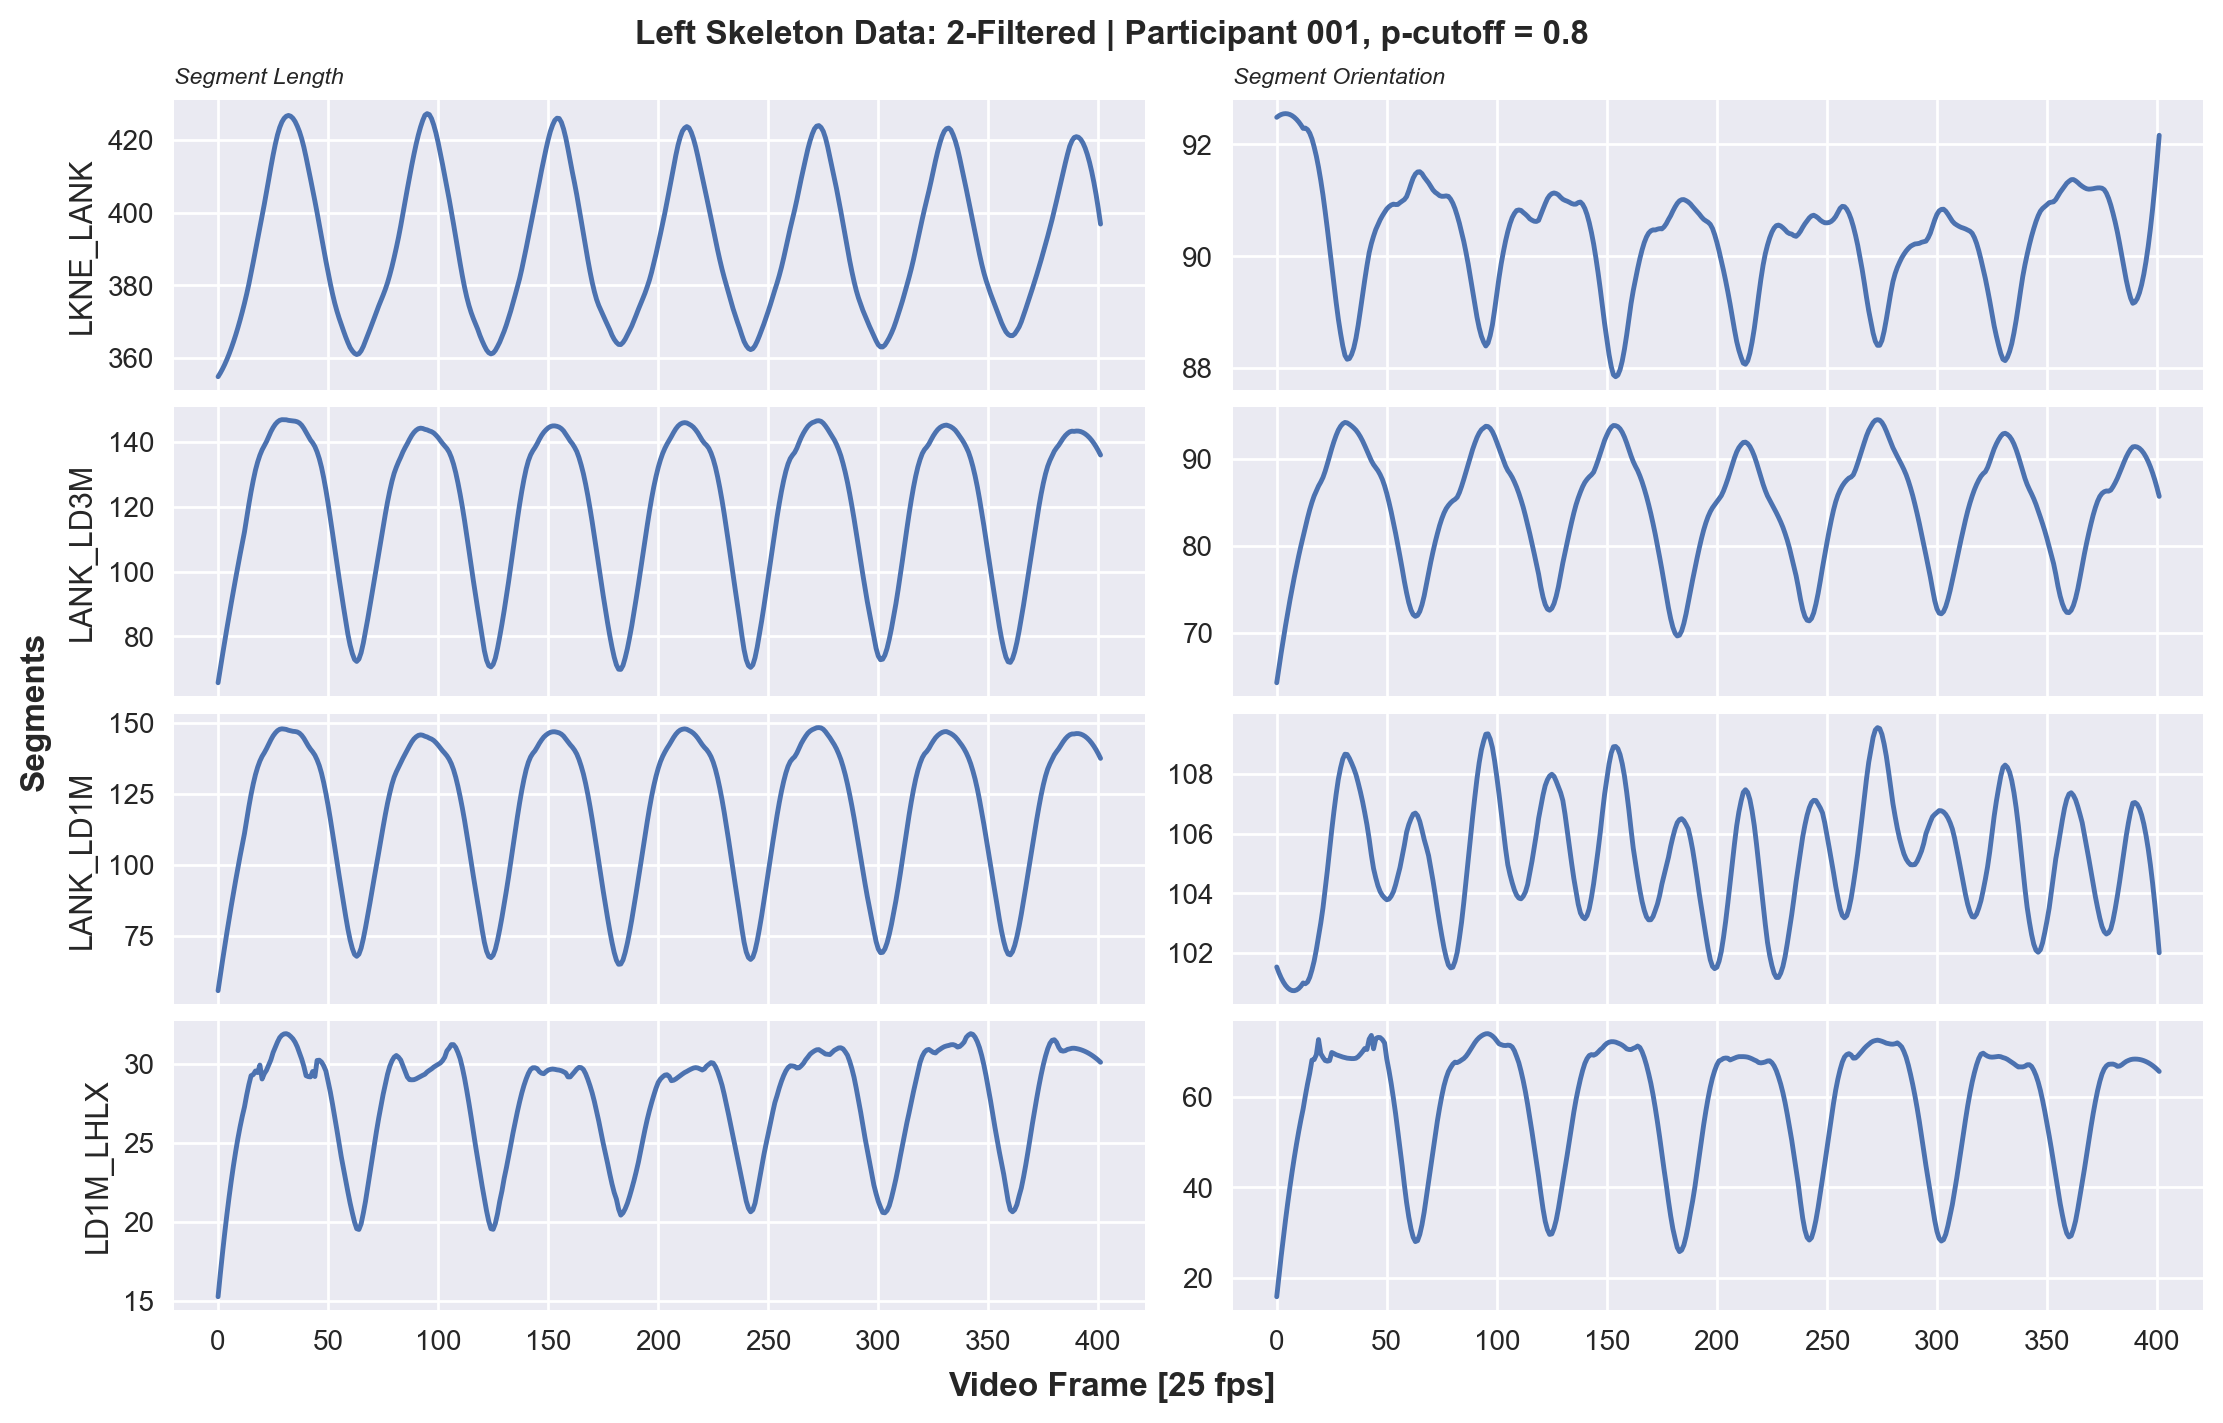

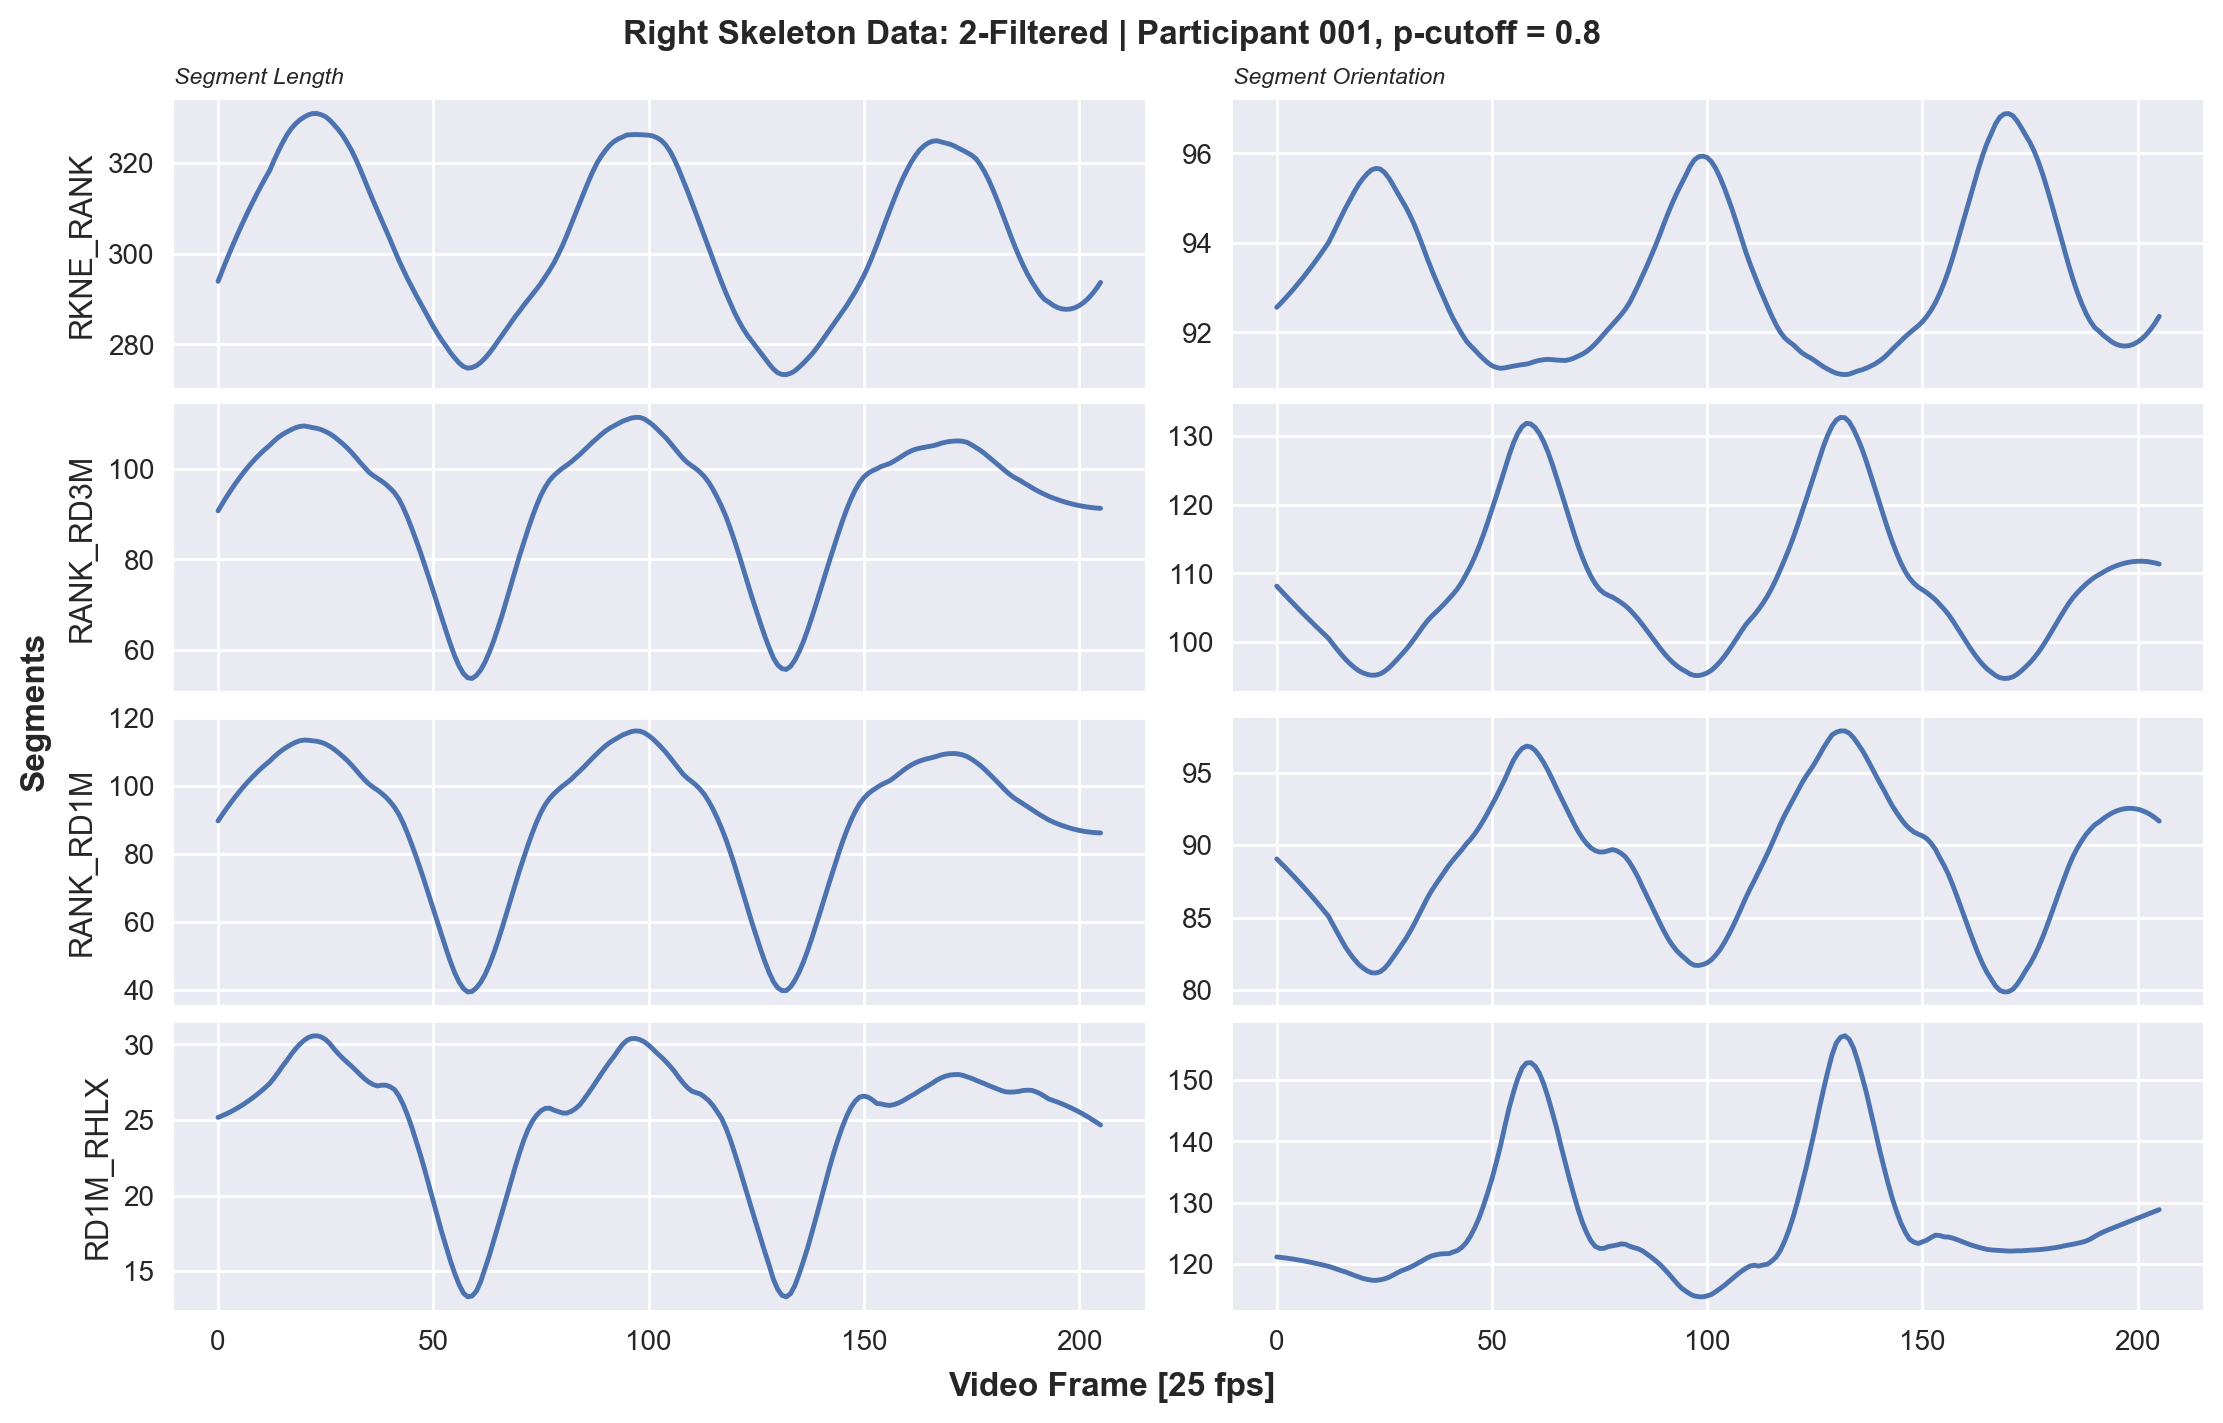

In [20]:
stage = '2-Filtered'

for i in IDs:
    mvmt_left = pd.read_csv(os.path.join(data_path,f'{stage}',f'{i}-mvmt-left.csv'))
    mvmt_right = pd.read_csv(os.path.join(data_path,f'{stage}',f'{i}-mvmt-right.csv'))
    skltn_left = pd.read_csv(os.path.join(data_path,f'{stage}',f'{i}-skltn-left.csv'))
    skltn_right = pd.read_csv(os.path.join(data_path,f'{stage}',f'{i}-skltn-right.csv'))

    visualize_data(i,stage,mvmt_left,mvmt_right,skltn_left,skltn_right)

## Visualize the scaled data

In [ ]:
stage = '3-Scaled'

for i in IDs:
    mvmt_left = pd.read_csv(os.path.join(data_path,f'{stage}',f'{i}-mvmt-left.csv'))
    mvmt_right = pd.read_csv(os.path.join(data_path,f'{stage}',f'{i}-mvmt-right.csv'))
    skltn_left = pd.read_csv(os.path.join(data_path,f'{stage}',f'{i}-skltn-left.csv'))
    skltn_right = pd.read_csv(os.path.join(data_path,f'{stage}',f'{i}-skltn-right.csv'))

    visualize_data(i,stage,mvmt_left,mvmt_right,skltn_left,skltn_right)

## Visualize the Normalized data

In [ ]:
stage = '4-Normalized'

for i in IDs:
    mvmt_left = pd.read_csv(os.path.join(data_path,f'{stage}',f'{i}-mvmt-left.csv'))
    mvmt_right = pd.read_csv(os.path.join(data_path,f'{stage}',f'{i}-mvmt-right.csv'))
    skltn_left = pd.read_csv(os.path.join(data_path,f'{stage}',f'{i}-skltn-left.csv'))
    skltn_right = pd.read_csv(os.path.join(data_path,f'{stage}',f'{i}-skltn-right.csv'))

    visualize_data(i,stage,mvmt_left,mvmt_right,skltn_left,skltn_right)